In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


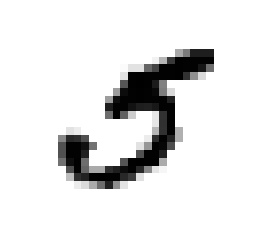

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[36000]

5.0

In [9]:
training_size = 60000
test_size = 10000
X_train, X_test = X[:training_size], X[training_size:]
print("sizes:", len(X_train), len(X_test))
y_train, y_test = y[:training_size], y[training_size:]

import numpy as np

shuffle_index = np.random.permutation(training_size)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

sizes: 60000 10000


# Exercise 9

In [28]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
%time rnd_clf.fit(X_train, y_train)

CPU times: user 2.96 s, sys: 8 ms, total: 2.97 s
Wall time: 2.97 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred_rf = rnd_clf.predict(X_test)
print("Test performance:", accuracy_score(y_test, y_pred_rf))

Test performance: 0.9471


In [20]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
#print(pca.explained_variance_ratio_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("To preserve 95% of the variance of the training set, we need to keep the best", d, "parameters.")

To preserve 95% of the variance of the training set, we need to keep the best 154 parameters.


In [34]:
pca = PCA(n_components = d)
X_train_reduced = pca.fit_transform(X_train)
# We can't fit it again for the test set otherwise we will have issues.
X_test_reduced = pca.transform(X_test)

In [35]:
print(X_train_reduced.shape)

(60000, 154)


In [36]:
reduced_rnd_clf = RandomForestClassifier()
%time reduced_rnd_clf.fit(X_train_reduced, y_train)

CPU times: user 7.53 s, sys: 8 ms, total: 7.54 s
Wall time: 7.56 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Reducing the dimensionality actually makes the training process longer.

In [37]:
y_pred_rf = reduced_rnd_clf.predict(X_test_reduced)
print("Test performance:", accuracy_score(y_test, y_pred_rf))

Test performance: 0.8938


Test performance dropped down to ~5%, which is serve. Ultimately dimensionality reduction doesn't help Random Forests for the MNIST dataset. The Author's solution has shown that it actually speeds up training by 4 times for a Softmax Logistic Regression model.

In [47]:
import os
os.system("shutdown")

0

# Exercise 10

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)

MemoryError: 